In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

In [3]:
train = pd.read_csv('train_storming_round.csv')
test = pd.read_csv('test_storming_round.csv')

# Getting Summary Statistics

In [4]:
# Get the data types of the columns
data_types = train.dtypes
data_types

row_id                              int64
agent_code                         object
agent_age                           int64
agent_join_month                   object
first_policy_sold_month            object
year_month                         object
unique_proposals_last_7_days        int64
unique_proposals_last_15_days       int64
unique_proposals_last_21_days       int64
unique_proposal                     int64
unique_quotations_last_7_days       int64
unique_quotations_last_15_days      int64
unique_quotations_last_21_days      int64
unique_quotations                   int64
unique_customers_last_7_days        int64
unique_customers_last_15_days       int64
unique_customers_last_21_days       int64
unique_customers                    int64
new_policy_count                    int64
ANBP_value                          int64
net_income                          int64
number_of_policy_holders            int64
number_of_cash_payment_policies     int64
dtype: object

In [6]:
# Finding the number pf null values in each column
null_values = train.isnull().sum()
null_values

row_id                             0
agent_code                         0
agent_age                          0
agent_join_month                   0
first_policy_sold_month            0
year_month                         0
unique_proposals_last_7_days       0
unique_proposals_last_15_days      0
unique_proposals_last_21_days      0
unique_proposal                    0
unique_quotations_last_7_days      0
unique_quotations_last_15_days     0
unique_quotations_last_21_days     0
unique_quotations                  0
unique_customers_last_7_days       0
unique_customers_last_15_days      0
unique_customers_last_21_days      0
unique_customers                   0
new_policy_count                   0
ANBP_value                         0
net_income                         0
number_of_policy_holders           0
number_of_cash_payment_policies    0
dtype: int64

In [4]:
# Getting the columns where data type is int64
int_columns = train.select_dtypes(include=['int64']).columns

# Remove 'row_id' from int_columns
int_columns = int_columns[int_columns != 'row_id']

# Get the summary of the int columns
int_summary = train[int_columns].describe()

In [8]:
int_summary

agent_age  unique_proposals_last_7_days  \
count  15308.000000                  15308.000000   
mean      40.585772                      1.491246   
std       11.688204                      1.119554   
min       20.000000                      0.000000   
25%       31.000000                      0.000000   
50%       41.000000                      1.000000   
75%       51.000000                      2.000000   
max       60.000000                      3.000000   

       unique_proposals_last_15_days  unique_proposals_last_21_days  \
count                   15308.000000                   15308.000000   
mean                        2.991116                      10.045728   
std                         2.001613                       6.037296   
min                         0.000000                       0.000000   
25%                         1.000000                       5.000000   
50%                         3.000000                      10.000000   
75%                         5.000000                      15.000000   
max                         6.000000                      20.000000   

       unique_proposal  unique_quotations_last_7_days  \
count     15308.000000                   15308.000000   
mean         17.516527                       1.989679   
std           6.616954                       1.420996   
min           1.000000                       0.000000   
25%          12.000000                       1.000000   
50%          17.000000                       2.000000   
75%          23.000000                       3.000000   
max          34.000000                       4.000000   

       unique_quotations_last_15_days  unique_quotations_last_21_days  \
count                    15308.000000                    15308.000000   
mean                         2.996538                        4.469624   
std                          2.004386                        2.875329   
min                          0.000000                        0.000000   
25%                          1.000000                        2.000000   
50%                          3.000000                        4.000000   
75%                          5.000000                        7.000000   
max                          6.000000                        9.000000   

       unique_quotations  unique_customers_last_7_days  \
count       15308.000000                  15308.000000   
mean           13.922394                      2.995493   
std             4.663777                      1.644117   
min             1.000000                      0.000000   
25%            11.000000                      2.000000   
50%            14.000000                      3.000000   
75%            17.000000                      4.000000   
max            32.000000                      6.000000   

       unique_customers_last_15_days  unique_customers_last_21_days  \
count                   15308.000000                   15308.000000   
mean                        4.997714                       7.500523   
std                         2.438918                       3.468597   
min                         0.000000                       0.000000   
25%                         3.000000                       5.000000   
50%                         5.000000                       8.000000   
75%                         7.000000                      10.000000   
max                        10.000000                      15.000000   

       unique_customers  new_policy_count    ANBP_value    net_income  \
count      15308.000000      15308.000000  1.530800e+04  1.530800e+04   
mean          15.493729         20.269990  1.025338e+06  2.280414e+05   
std            4.542321          9.541693  8.054989e+05  1.736671e+05   
min            1.000000          0.000000  0.000000e+00  1.160000e+03   
25%           12.000000         15.000000  3.473238e+05  9.282500e+04   
50%           15.000000         21.000000  9.031445e+05  1.899740e+05   
75%           19.000000         27.000000  1.5

Let's visualise the distributions of the attributes

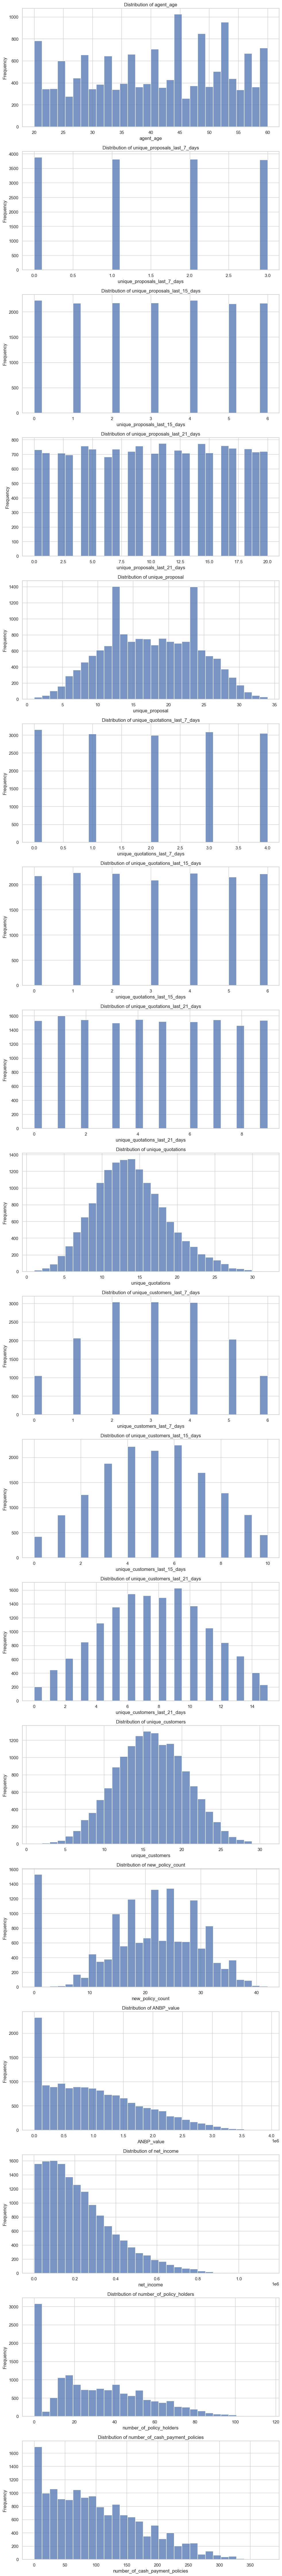

In [ ]:
# Showing the distribution of the int columns
fig, axes = plt.subplots(nrows=len(int_columns), ncols=1, figsize=(10, 5 * len(int_columns)))

# Loop through each int column and create a histogram
for i, col in enumerate(int_columns):
    sns.histplot(train[col], bins=30, kde=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()

# Sales Pattern Variation By Month

To do this, we must get the sum of new_policy_count in each month

In [6]:
patterns = train[['year_month','new_policy_count']]
patterns

year_month  new_policy_count
0       1/1/2023                 0
1       1/1/2023                25
2       1/1/2023                26
3       1/1/2023                18
4       1/1/2023                20
...          ...               ...
15303   8/1/2024                25
15304   8/1/2024                15
15305   8/1/2024                30
15306   8/1/2024                 0
15307   8/1/2024                19

[15308 rows x 2 columns]

In [17]:
# Get the sum of new_policy_count for each month
policy_count_by_month = train.groupby('year_month')['new_policy_count'].sum().reset_index()
policy_count_by_month

year_month  new_policy_count
0    1/1/2023             12887
1    1/1/2024             15922
2   10/1/2023             15273
3   11/1/2023             16002
4   12/1/2023             15394
5    2/1/2023             13617
6    2/1/2024             15863
7    3/1/2023             13591
8    3/1/2024             16666
9    4/1/2023             13629
10   4/1/2024             17176
11   5/1/2023             14248
12   5/1/2024             17330
13   6/1/2023             14065
14   6/1/2024             17370
15   7/1/2023             14327
16   7/1/2024             18512
17   8/1/2023             14956
18   8/1/2024             18569
19   9/1/2023             14896

In [18]:
# Convert 'year_month' to datetime format
policy_count_by_month['year_month'] = pd.to_datetime(policy_count_by_month['year_month'], format='%m/%d/%Y')
# Set 'year_month' as the index
policy_count_by_month.set_index('year_month', inplace=True)

In [19]:
# Order the data by year_month
policy_count_by_month = policy_count_by_month.sort_index()
policy_count_by_month

new_policy_count
year_month                  
2023-01-01             12887
2023-02-01             13617
2023-03-01             13591
2023-04-01             13629
2023-05-01             14248
2023-06-01             14065
2023-07-01             14327
2023-08-01             14956
2023-09-01             14896
2023-10-01             15273
2023-11-01             16002
2023-12-01             15394
2024-01-01             15922
2024-02-01             15863
2024-03-01             16666
2024-04-01             17176
2024-05-01             17330
2024-06-01             17370
2024-07-01             18512
2024-08-01             18569

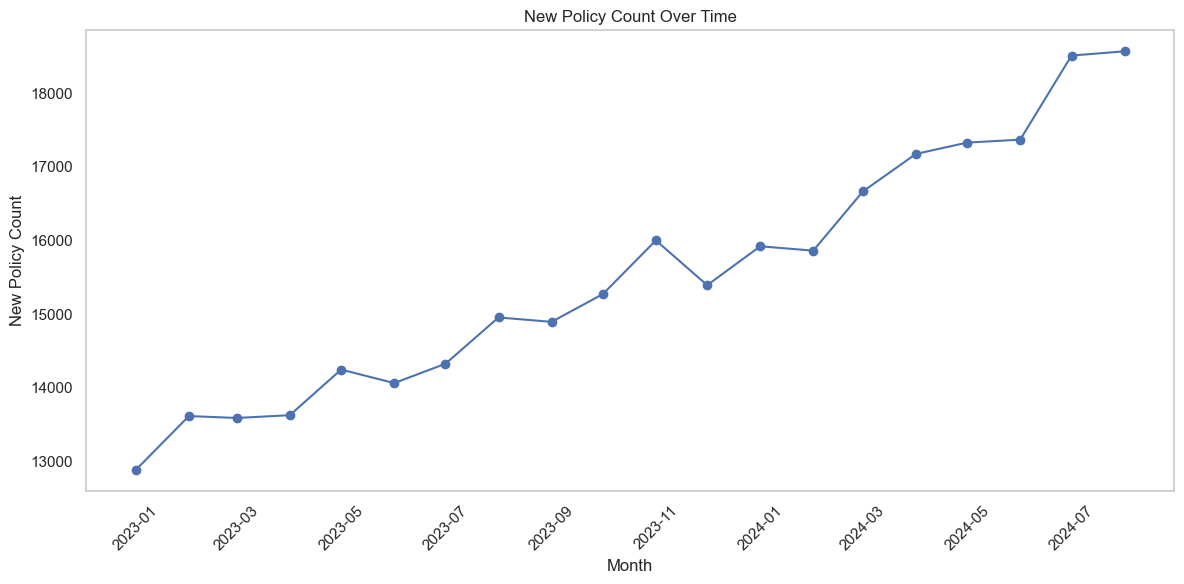

In [20]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(policy_count_by_month.index, policy_count_by_month['new_policy_count'], marker='o')
plt.title('New Policy Count Over Time')
plt.xlabel('Month')
plt.ylabel('New Policy Count')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.show()

We are calculating percentage change for each month compared to previous month. 

Percentage Change = (Current Month - Previous Month) / Previous Month × 100


In [21]:
percentage_change = policy_count_by_month.pct_change() * 100
percentage_change

new_policy_count
year_month                  
2023-01-01               NaN
2023-02-01          5.664623
2023-03-01         -0.190938
2023-04-01          0.279597
2023-05-01          4.541786
2023-06-01         -1.284391
2023-07-01          1.862780
2023-08-01          4.390312
2023-09-01         -0.401177
2023-10-01          2.530881
2023-11-01          4.773129
2023-12-01         -3.799525
2024-01-01          3.429908
2024-02-01         -0.370556
2024-03-01          5.062094
2024-04-01          3.060122
2024-05-01          0.896600
2024-06-01          0.230814
2024-07-01          6.574554
2024-08-01          0.307908

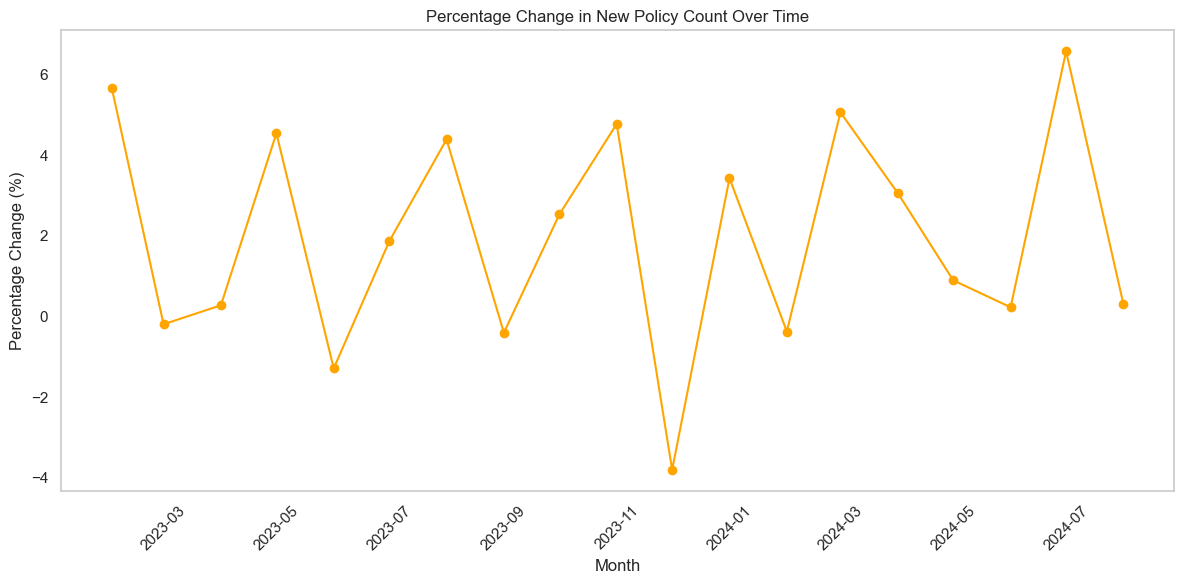

In [22]:
percentage_change = percentage_change.dropna()

# Plot the percentage change
plt.figure(figsize=(12, 6))
plt.plot(percentage_change.index, percentage_change['new_policy_count'], marker='o', color='orange')
plt.title('Percentage Change in New Policy Count Over Time')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()

plt.show()

We can see that 2023 December has shown a considerable drop compared with the previous month. 2024 July also shows a significant spike.

# Multivariate Analysis

We decided to create a scatterplot matrix for multivariate analysis

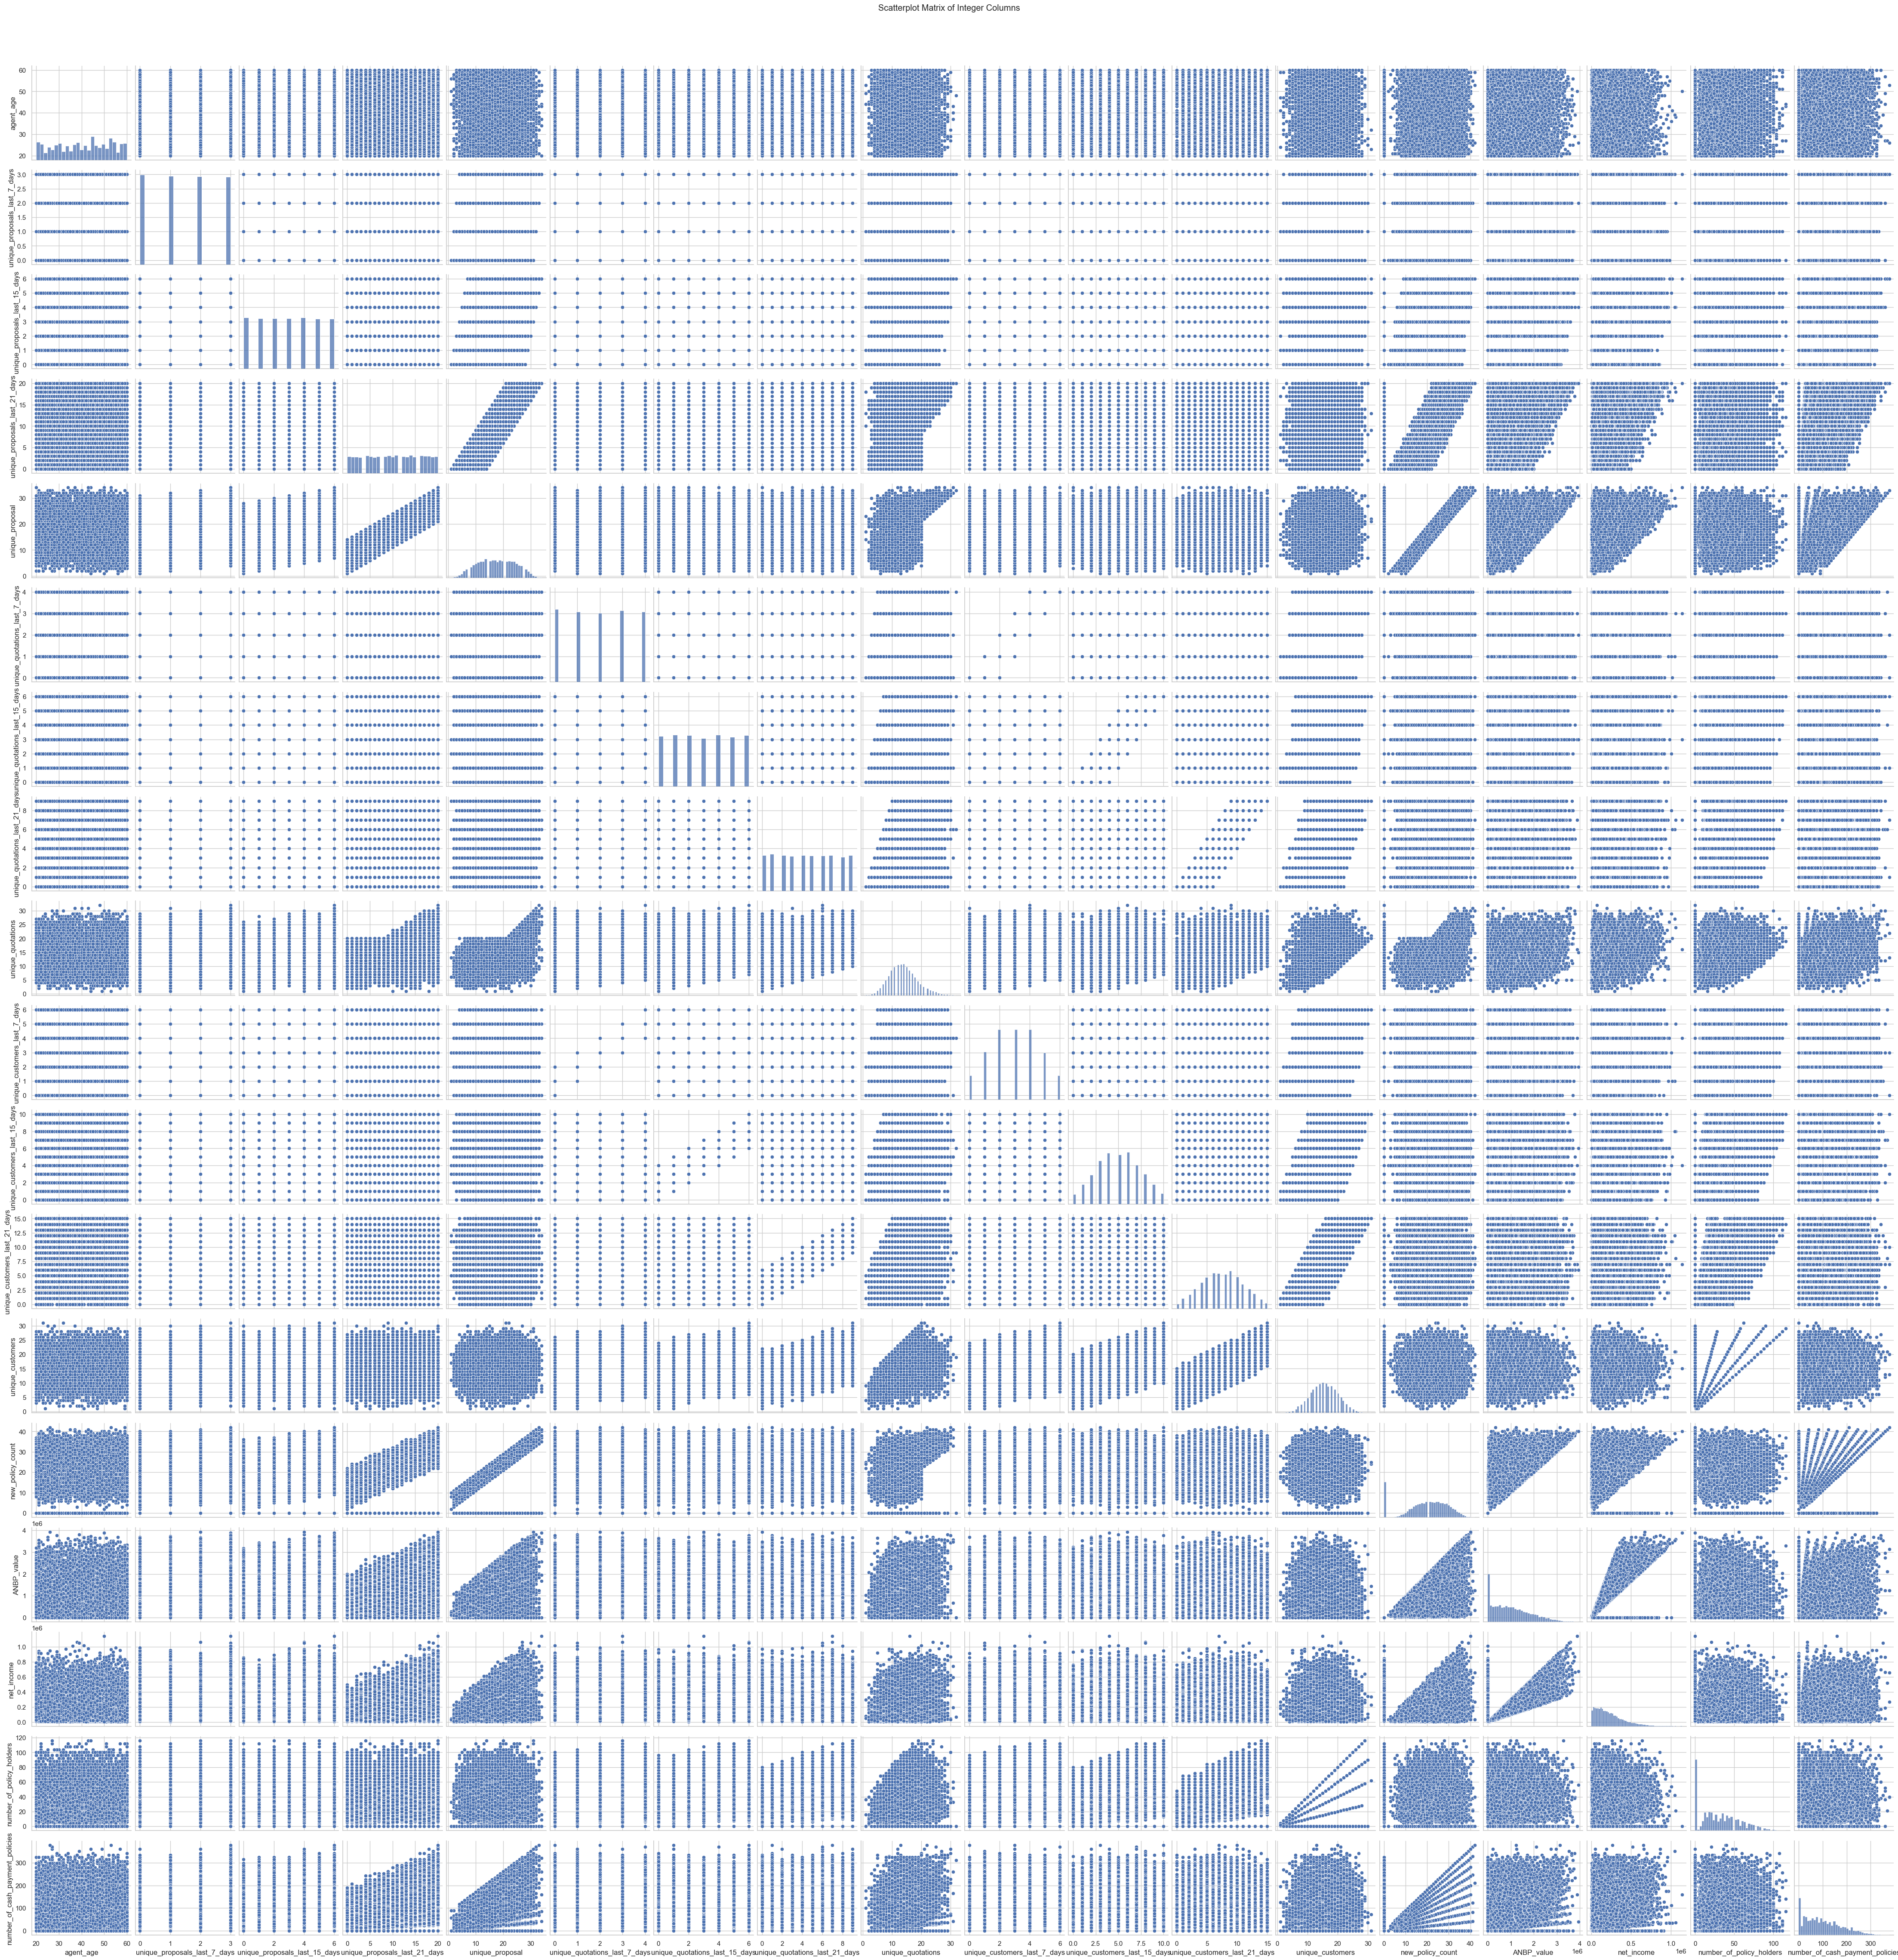

In [24]:
# Create a scatterplot matrix to visualize the relationships between all int columns
sns.pairplot(train[int_columns])
plt.suptitle('Scatterplot Matrix of Integer Columns', y=1.02)
plt.show()

Since there are about 18 numerical values, it is hard to show them all clearly on a single scatterplot matrix.

Use the "Expand Image" button (one that looks like a bar chart) at the top right corner of the visualization.

We can see that some features are highly correlated.

# Individual Agent Trajectories Over Time

In [5]:
# Convert 'year_month' to datetime format
train['year_month'] = pd.to_datetime(train['year_month'], format='%m/%d/%Y')
# Set 'year_month' as the index
train.set_index('year_month', inplace=True)

train = train.sort_index()
train

row_id agent_code  agent_age agent_join_month  \
year_month                                                  
2023-01-01       1   455ca878         45         2/1/2021   
2023-01-01       2   c823ce77         48         4/1/2022   
2023-01-01       3   62154055         53         5/1/2020   
2023-01-01       4   c58bfa6e         44         7/1/2019   
2023-01-01       5   b1e5f770         20         9/1/2020   
...            ...        ...        ...              ...   
2024-08-01   15304   d3b44e44         43         4/1/2019   
2024-08-01   15305   0b1d7054         28         9/1/2022   
2024-08-01   15306   51321fa2         45         1/1/2021   
2024-08-01   15307   dd4a0d2d         25        12/1/2021   
2024-08-01   15308   393f3bf6         53         1/1/2023   

           first_policy_sold_month  unique_proposals_last_7_days  \
year_month                                                         
2023-01-01                9/1/2023                             3   
2023-01-01                2/1/2024                             1   
2023-01-01                9/1/2023                             3   
2023-01-01                3/1/2022                             1   
2023-01-01                2/1/2023                             0   
...                            ...                           ...   
2024-08-01               10/1/2023                             1   
2024-08-01                3/1/2024                             1   
2024-08-01                4/1/2024                             0   
2024-08-01               12/1/2023                             0   
2024-08-01                2/1/2024                             1   

            unique_proposals_last_15_days  unique_proposals_last_21_days  \
year_month                                                                 
2023-01-01                              6                              2   
2023-01-01                              4                             12   
2023-01-01                              5                              5   
2023-01-01                              0                             12   
2023-01-01                              6                             10   
...                                   ...                            ...   
2024-08-01                              6                              6   
2024-08-01                              5                              3   
2024-08-01                              6                             17   
2024-08-01                              4                              6   
2024-08-01                              4                              7   

            unique_proposal  unique_quotations_last_7_days  ...  \
year_month                                                  ...   
2023-01-01               12                              3  ...   
2023-01-01               21                              3  ...   
2023-01-01               17                              1  ...   
2023-01-01               17                              1  ...   
2023-01-01               17                              3  ...   
...                     ...                            ...  ...   
2024-08-01               17                              1  ...   
2024-08-01               13                              2  ...   
2024-08-01               26                              4  ...   
2024-08-01               14                              4  ...   
2024-08-01               16                              1  ...   

            unique_quotations  unique_customers_last_7_days  \
year_month                                                    
2023-01-01                  9                             3   
2023-01-01                 14                             4   
2023-01-01                 14                             3   
2023-01-01                 11                             2   
2023-01-01                 13                             3   
...                       ...  

In [6]:
# Ordering the data by agent_code and year_month
train = train.sort_values(by=['agent_code', 'year_month'])
train

row_id agent_code  agent_age agent_join_month  \
year_month                                                  
2023-01-01       9   003c1999         35         8/1/2020   
2023-02-01     959   003c1999         35         8/1/2020   
2023-03-01    1762   003c1999         35         8/1/2020   
2023-04-01    2578   003c1999         35         8/1/2020   
2023-05-01    2709   003c1999         35         8/1/2020   
...            ...        ...        ...              ...   
2024-04-01   10977   fffb525d         32         3/1/2020   
2024-05-01   12009   fffb525d         32         3/1/2020   
2024-06-01   12951   fffb525d         32         3/1/2020   
2024-07-01   13906   fffb525d         32         3/1/2020   
2024-08-01   14570   fffb525d         32         3/1/2020   

           first_policy_sold_month  unique_proposals_last_7_days  \
year_month                                                         
2023-01-01               12/1/2022                             2   
2023-02-01               12/1/2022                             3   
2023-03-01               12/1/2022                             0   
2023-04-01               12/1/2022                             2   
2023-05-01               12/1/2022                             3   
...                            ...                           ...   
2024-04-01               11/1/2023                             2   
2024-05-01               11/1/2023                             0   
2024-06-01               11/1/2023                             2   
2024-07-01               11/1/2023                             1   
2024-08-01               11/1/2023                             2   

            unique_proposals_last_15_days  unique_proposals_last_21_days  \
year_month                                                                 
2023-01-01                              2                              0   
2023-02-01                              2                             20   
2023-03-01                              2                             19   
2023-04-01                              6                             11   
2023-05-01                              3                              7   
...                                   ...                            ...   
2024-04-01                              6                              7   
2024-05-01                              6                             12   
2024-06-01                              6                              5   
2024-07-01                              1                             20   
2024-08-01                              1                             14   

            unique_proposal  unique_quotations_last_7_days  ...  \
year_month                                                  ...   
2023-01-01                8                              0  ...   
2023-02-01               30                              0  ...   
2023-03-01               23                              2  ...   
2023-04-01               21                              3  ...   
2023-05-01               15                              4  ...   
...                     ...                            ...  ...   
2024-04-01               17                              1  ...   
2024-05-01               23                              0  ...   
2024-06-01               14                              1  ...   
2024-07-01               27                              0  ...   
2024-08-01               18                              4  ...   

            unique_quotations  unique_customers_last_7_days  \
year_month                                                    
2023-01-01                  2                             2   
2023-02-01                 14                             2   
2023-03-01                 19                             4   
2023-04-01                 19                             4   
2023-05-01                 14                             4   
...                       ...  

In [7]:
# Get the unique agent codes
unique_agents = train['agent_code'].unique().tolist()
unique_agents

['003c1999',
 '00d5bda3',
 '012a3553',
 '012f0e15',
 '0177ed5f',
 '01a4ff82',
 '01b0edf6',
 '01c0860d',
 '01c63d8e',
 '01cf7b40',
 '026b60ee',
 '026ffb43',
 '0279d0a7',
 '03216cb4',
 '0330163d',
 '041aede5',
 '0439a5fc',
 '046d7894',
 '04cd94ce',
 '04f897f5',
 '0522b331',
 '05339eaf',
 '057dd1b3',
 '0599fb2d',
 '05cb3b30',
 '068c4b6c',
 '06acbf85',
 '06dfa6a3',
 '071a8882',
 '071c1880',
 '084c02de',
 '0879757d',
 '087ef587',
 '08a278cd',
 '08d93405',
 '08dd9dac',
 '096ab135',
 '09b8e785',
 '0a14b2af',
 '0a318094',
 '0a37f9af',
 '0a419b45',
 '0a75b64a',
 '0aaac9a7',
 '0aacb7a8',
 '0acddc02',
 '0af61868',
 '0b1be2b8',
 '0b1d7054',
 '0b51084d',
 '0b5ebeaa',
 '0bae2f2d',
 '0bb2468d',
 '0c0e65a4',
 '0c22f517',
 '0d045ee9',
 '0db1f74b',
 '0e0c2212',
 '0e123beb',
 '0e34a568',
 '0e4280de',
 '0e4770a7',
 '0e4db07d',
 '0f111c9b',
 '0f4994af',
 '0f4c38b4',
 '0f6f67b0',
 '0fc88310',
 '0fd5804f',
 '10944892',
 '10be4b4c',
 '10dabaca',
 '11029f56',
 '11b6f9e5',
 '11c7cd6c',
 '11ddf2a7',
 '11edb733',

Make sure you create a file named "tracjectories" in the same folder as this notebook.

In [8]:
# For each agent, visualize the new_policy_count over time
for agent in unique_agents:
    agent_data = train[train['agent_code'] == agent]
    
    plt.figure(figsize=(12, 6))
    plt.plot(agent_data.index, agent_data['new_policy_count'], marker='o')
    plt.title(f'New Policy Count Over Time for Agent {agent}')
    plt.xlabel('Month')
    plt.ylabel('New Policy Count')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    
    plt.savefig(f'trajectories/{agent}.svg', format='svg')
    plt.close()

# Innovative EDA

Correlation matrix between numerical variables

In [6]:
# Correlation matrix
correlation_matrix = train[int_columns].corr()
correlation_matrix



agent_age  unique_proposals_last_7_days  \
agent_age                         1.000000                     -0.004863   
unique_proposals_last_7_days     -0.004863                      1.000000   
unique_proposals_last_15_days    -0.003500                     -0.001842   
unique_proposals_last_21_days    -0.002087                     -0.006088   
unique_proposal                  -0.002965                      0.162677   
unique_quotations_last_7_days     0.007775                      0.003187   
unique_quotations_last_15_days   -0.007571                      0.001602   
unique_quotations_last_21_days    0.007595                      0.001571   
unique_quotations                 0.005359                      0.094911   
unique_customers_last_7_days      0.004537                      0.006917   
unique_customers_last_15_days    -0.009656                      0.009336   
unique_customers_last_21_days     0.006458                      0.005940   
unique_customers                  0.001389                      0.012052   
new_policy_count                  0.003663                      0.096184   
ANBP_value                       -0.000467                      0.064688   
net_income                       -0.006067                      0.064931   
number_of_policy_holders         -0.003387                      0.000112   
number_of_cash_payment_policies  -0.004036                      0.065227   

                                 unique_proposals_last_15_days  \
agent_age                                            -0.003500   
unique_proposals_last_7_days                         -0.001842   
unique_proposals_last_15_days                         1.000000   
unique_proposals_last_21_days                         0.003483   
unique_proposal                                       0.305104   
unique_quotations_last_7_days                         0.000427   
unique_quotations_last_15_days                       -0.010771   
unique_quotations_last_21_days                       -0.003305   
unique_quotations                                     0.174254   
unique_customers_last_7_days                          0.002092   
unique_customers_last_15_days                        -0.014618   
unique_customers_last_21_days                        -0.009569   
unique_customers                                     -0.014399   
new_policy_count                                      0.193934   
ANBP_value                                            0.121628   
net_income                                            0.121105   
number_of_policy_holders                             -0.010781   
number_of_cash_payment_policies                       0.131376   

                                 unique_proposals_last_21_days  \
agent_age                                            -0.002087   
unique_proposals_last_7_days                         -0.006088   
unique_proposals_last_15_days                         0.003483   
unique_proposals_last_21_days                         1.000000   
unique_proposal                                       0.913815   
unique_quotations_last_7_days                         0.015224   
unique_quotations_last_15_days                        0.003139   
unique_quotations_last_21_days                       -0.002223   
unique_quotations                                     0.524076   
unique_customers_last_7_days                          0.020457   
unique_customers_last_15_days                         0.001773   
unique_customers_last_21_days                        -0.012361   
unique_customers                                     -0.001083   
new_policy_count                                      0.569788   
ANBP_value                                            0.343318   
net_income                                            0.355436   
number_of_policy_holders                              0.006722   
number_of_cash_payment_policies                       0.358437   

                                 unique_proposal  \
agent_age                 

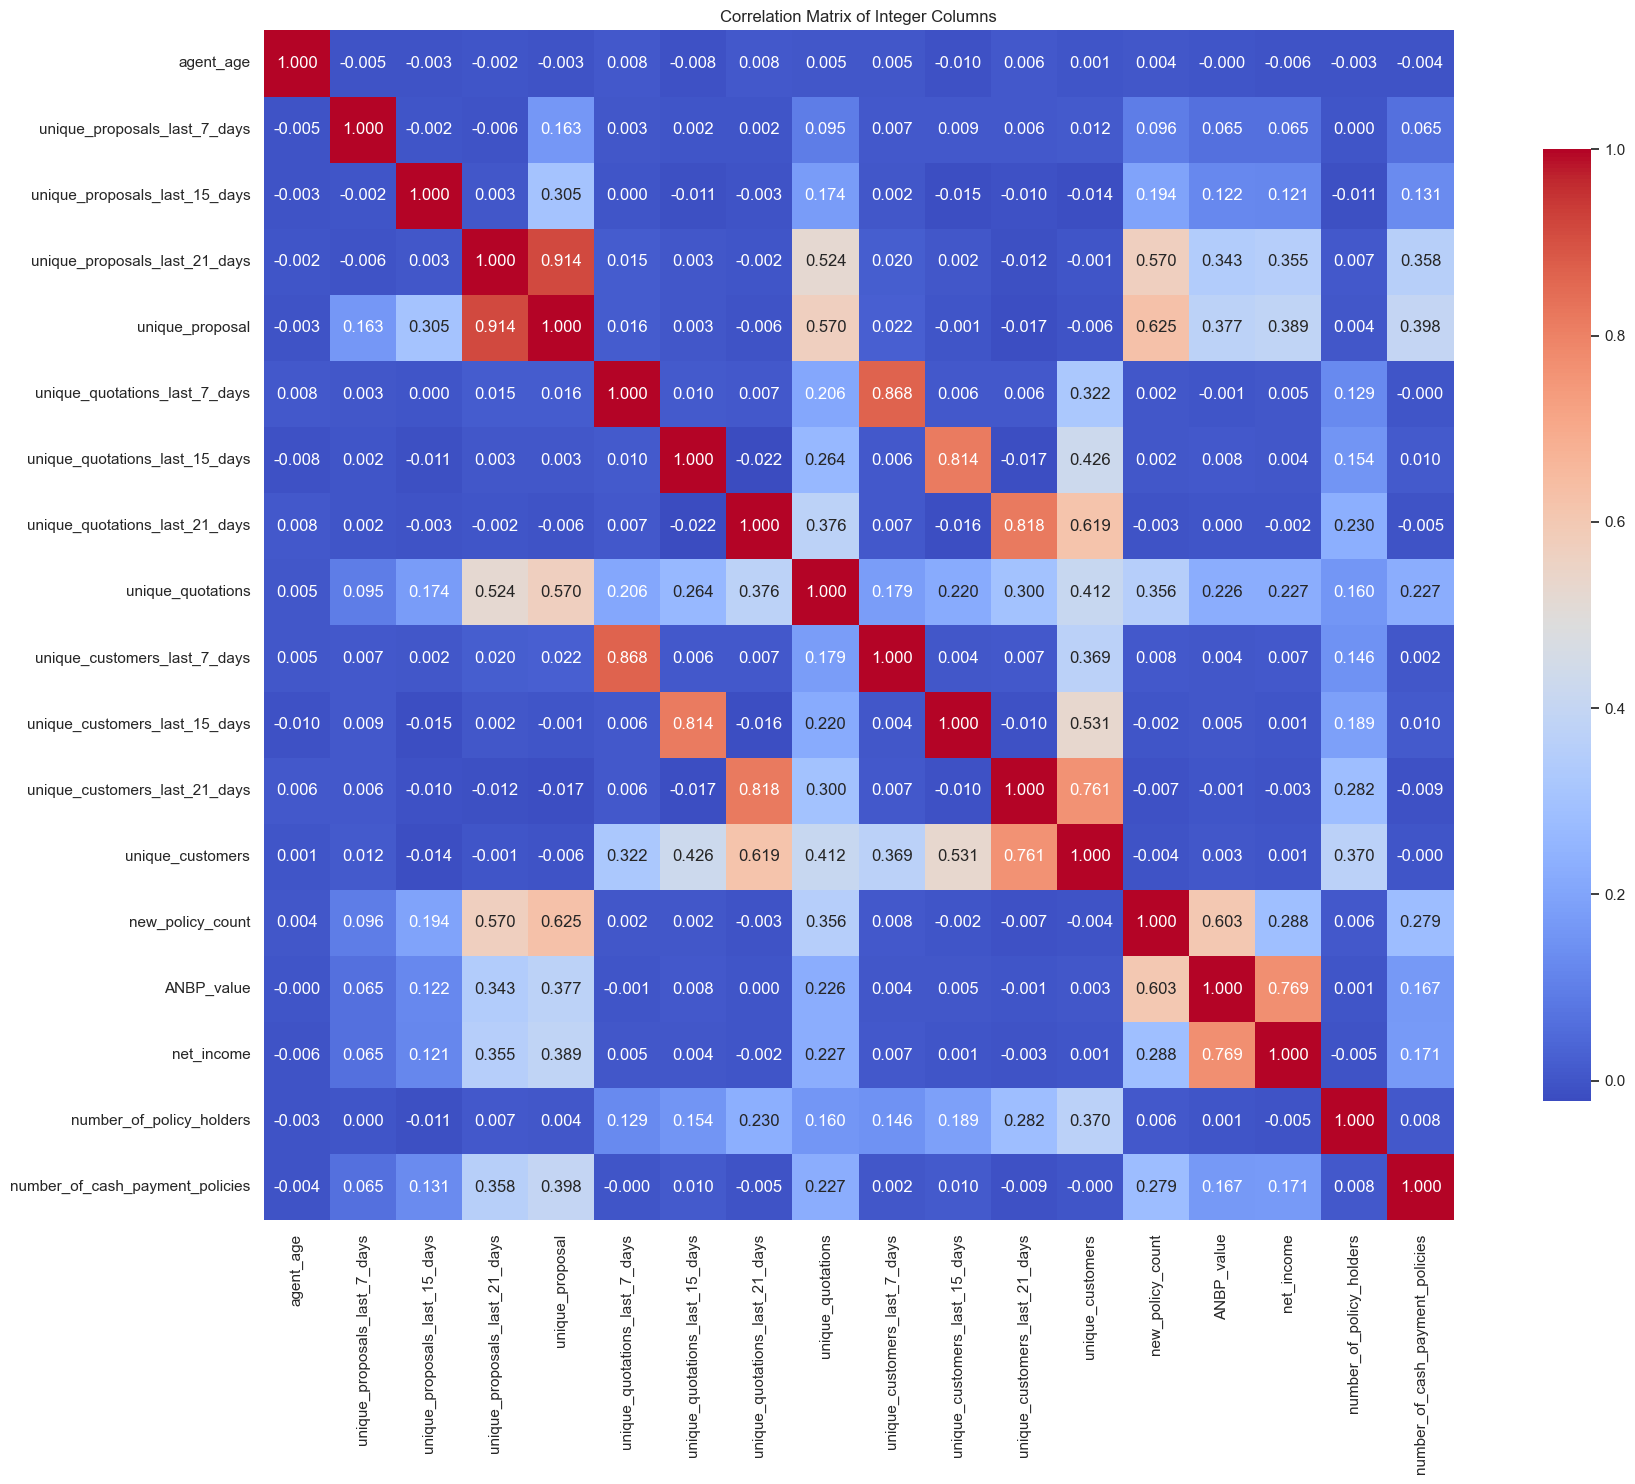

In [11]:
# A heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Integer Columns')
plt.tight_layout()
plt.show()

